In [1]:
import pandas as pd

df = pd.read_csv('AIA_Churn_Modelling_Case_Study.csv')
import pandas as pd



In [2]:
df.describe()
# Null and categorical values checked with gpt-4 analytics tool.

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
for i in df.columns:
    print(df[i].value_counts())

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

In [91]:
print((df['MonthlyCharges'] == 0).any())

False


In [6]:
df = df.drop("customerID", axis = 1)

In [8]:
df.shape

(7043, 20)

In [26]:
# single household?
df[(df.Partner ==  'No') & (df.Dependents == 'No')].shape

# adding as factor
df['SingleHouseHold'] =  (df.Partner ==  'No') & (df.Dependents == 'No')


In [16]:
df[df.Churn == 'No'].tenure.mean()

37.56996521066873

In [14]:
# potential loss of
print(37*64*1869)

# average lifetime spending
print(4425792/5174)

4425792
855.3908001546192


In [ ]:
import pyplot
df.barplot("SeniorCitizen")


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


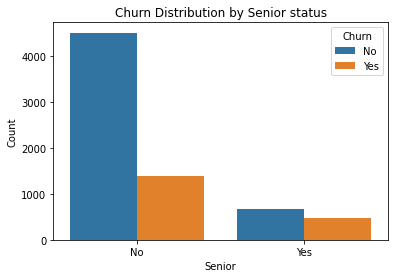

In [33]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Churn' is your target variable and 'InternetService' is the category you want to analyze.
# Replace 'InternetService' with your categorical variable of interest.
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})


sns.countplot(x='SeniorCitizen', hue='Churn', data=df)

plt.title('Churn Distribution by Senior status')
plt.xlabel('Senior')
plt.ylabel('Count')
plt.show()


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


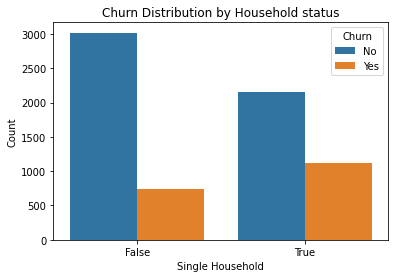

In [92]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Churn' is your target variable and 'InternetService' is the category you want to analyze.
# Replace 'InternetService' with your categorical variable of interest.
sns.countplot(x='SingleHouseHold', hue='Churn', data=df)

plt.title('Churn Distribution by Household status')
plt.xlabel('Single Household')
plt.ylabel('Count')
plt.show()

In [151]:
correlation_matrix = df_encoded.corr()

# Threshold for considering consolidation
threshold = 0.8

# Find features with a correlation greater than the threshold
highly_correlated_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs < 1]  # Remove self-correlation
highly_correlated_pairs = highly_correlated_pairs[abs(highly_correlated_pairs) > threshold]



print(highly_correlated_pairs)

tenure        TotalCharges    0.825464
TotalCharges  tenure          0.825464
dtype: float64


In [152]:


# Convert 'TotalCharges' to numeric, setting errors='coerce' will replace non-convertible values with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values for 'TotalCharges' by replacing them with the median or dropping
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)




# Identify numerical columns (we assume 'SeniorCitizen' is already properly encoded as 0 or 1)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object','boolean']).columns.tolist()

# Apply one-hot encoding to the categorical columns
df_encoded_categorical = pd.get_dummies(df[categorical_columns], drop_first=True)

# Combine the numerical and encoded categorical columns
df_encoded = pd.concat([df[numerical_columns], df_encoded_categorical], axis=1)

# Create a new column 'YearlySubscription' that is 1 if either 'Contract_One year' or 'Contract_Two year' is 1
df_encoded['YearlySubscription'] = ((df_encoded['Contract_One year'] == 1) | (df_encoded['Contract_Two year'] == 1)).astype(int)

# Now you can drop the original 'Contract_One year' and 'Contract_Two year' columns
df_encoded = df_encoded.drop(['Contract_One year', 'Contract_Two year'], axis=1)

# Dropping nophoneservice_mutliple, already covered in another column
df_encoded = df_encoded.drop(['MultipleLines_No phone service'], axis=1)

# Dropping already implied by products times tenure
df_encoded = df_encoded.drop(['TotalCharges'], axis=1)

    

# Now drop the original columns that you've consolidated

# Now attempt to drop the columns, and if they don't exist, it will raise an error
df_encoded = df_encoded.drop([
        'StreamingMovies_No internet service', 
        'OnlineSecurity_No internet service',
        'OnlineBackup_No internet service',
        'DeviceProtection_No internet service',
        'TechSupport_No internet service',
        'StreamingTV_No internet service'
    ], axis=1)



# Now df_encoded should be ready for further analysis
df_encoded.head()


,tenure,MonthlyCharges,SingleHouseHold,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,YearlySubscription
0,1,29.85,False,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,34,56.95,True,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,2,53.85,True,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
3,45,42.30,True,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
4,2,70.70,True,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0


In [157]:
correlation_matrix = df_encoded.corr()

# Threshold for considering consolidation
threshold = 0.5

# Find features with a correlation greater than the threshold
highly_correlated_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs < 1]  # Remove self-correlation
highly_correlated_pairs = highly_correlated_pairs[abs(highly_correlated_pairs) > threshold]



print(highly_correlated_pairs)

MonthlyCharges               InternetService_Fiber optic    0.787066
InternetService_Fiber optic  MonthlyCharges                 0.787066
YearlySubscription           tenure                         0.645561
tenure                       YearlySubscription             0.645561
MonthlyCharges               StreamingTV_Yes                0.629603
StreamingTV_Yes              MonthlyCharges                 0.629603
StreamingMovies_Yes          MonthlyCharges                 0.627429
MonthlyCharges               StreamingMovies_Yes            0.627429
StreamingTV_Yes              StreamingMovies_Yes            0.533094
StreamingMovies_Yes          StreamingTV_Yes                0.533094
MonthlyCharges               InternetService_No            -0.763557
InternetService_No           MonthlyCharges                -0.763557
dtype: float64


In [153]:
# These are covered in singlehousehold
df_encoded.drop(['Partner_Yes'], axis = 1, inplace = True)
df_encoded.drop(['Dependents_Yes'], axis = 1, inplace = True)

df_encoded.columns

Index(['tenure', 'MonthlyCharges', 'SingleHouseHold', 'gender_Male',
       'SeniorCitizen_Yes', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes', 'YearlySubscription'],
      dtype='object')

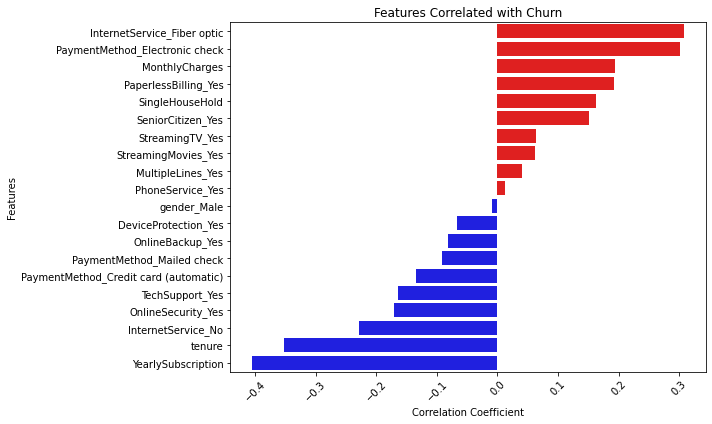

In [186]:
# Assuming 'df_encoded' is your one-hot encoded dataframe and 'correlation_matrix' is already calculated
correlation_with_churn = df_encoded.corr()['Churn_Yes'].sort_values(ascending=False)


# Assuming 'top_bottom_10' is your Series with the top and bottom 5 features
correlation_with_churn = correlation_with_churn.reset_index()
correlation_with_churn.columns = ['Feature', 'Correlation']

#Removing Churn_yes
correlation_with_churn = correlation_with_churn.drop(index=0)

# Use seaborn's barplot to plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=correlation_with_churn,
            palette=['blue' if x < 0 else 'red' for x in correlation_with_churn['Correlation']])
plt.title('Features Correlated with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.tight_layout()
plt.show()





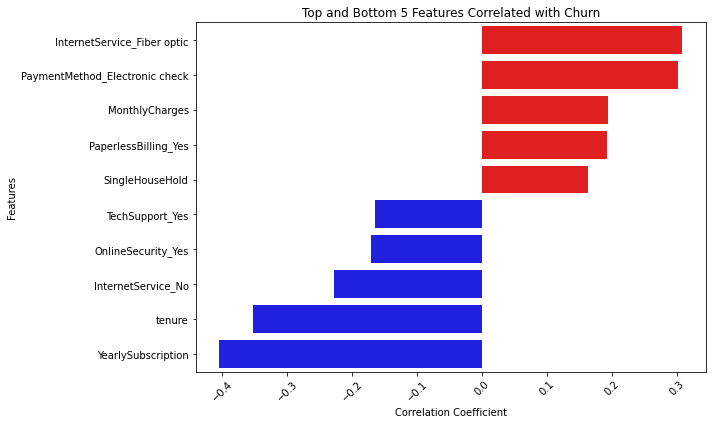

In [185]:
# Assuming 'df_encoded' is your one-hot encoded dataframe and 'correlation_matrix' is already calculated
correlation_with_churn = df_encoded.corr()['Churn_Yes'].sort_values(ascending=False)

# Select the top 5 positively correlated features, excluding 'Churn_Yes' itself
top_5_positive = correlation_with_churn[1:6]

# Select the bottom 5 negatively correlated features
bottom_5_negative = correlation_with_churn[-5:]

# Combine the two series
top_bottom_10 = pd.concat([top_5_positive, bottom_5_negative])


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'top_bottom_10' is your Series with the top and bottom 5 features
top_bottom_10 = top_bottom_10.reset_index()
top_bottom_10.columns = ['Feature', 'Correlation']


# Isolating the 'Churn_Yes' correlation and removing the 'Churn_Yes' row
# to avoid a perfect correlation of 1 with itself
churn_correlation = correlation_matrix[['Churn_Yes']].drop(['Churn_Yes'])

# Use seaborn's barplot to plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=top_bottom_10,
            palette=['blue' if x < 0 else 'red' for x in top_bottom_10['Correlation']])
plt.title('Top and Bottom 5 Features Correlated with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.tight_layout()
plt.show()



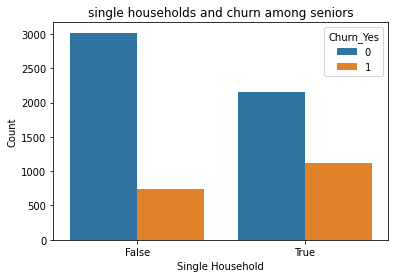

In [191]:
# Filter the DataFrame for seniors only
seniors_df = df_encoded[df_encoded['SeniorCitizen_Yes'] == 1]

# Create the bar plot
sns.countplot(x='SingleHouseHold', hue='Churn_Yes', data=df_encoded)

# Set the title and labels
plt.title('single households and churn among seniors')
plt.xlabel('Single Household')
plt.ylabel('Count')
plt.show()

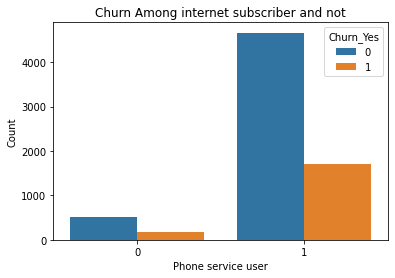

In [222]:

# Create the bar plot
sns.countplot(x='PhoneService_Yes', hue='Churn_Yes', data=df_encoded)

# Set the title and labels
plt.title('Churn Among internet subscriber and not')
plt.xlabel('Phone service user')
plt.ylabel('Count')
plt.show()

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


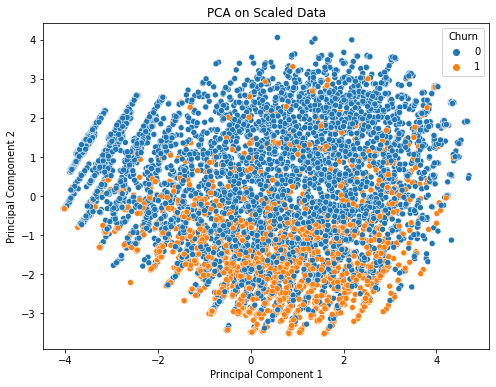

       tenure  MonthlyCharges  SingleHouseHold  gender_Male  \
PC1  0.212977        0.425391        -0.077424    -0.008182   
PC2  0.386065       -0.137360        -0.236484     0.005524   

     SeniorCitizen_Yes  PhoneService_Yes  MultipleLines_Yes  \
PC1           0.109793          0.029933           0.234286   
PC2          -0.176697         -0.091349          -0.014872   

     InternetService_Fiber optic  InternetService_No  OnlineSecurity_Yes  \
PC1                     0.275707           -0.333276            0.181178   
PC2                    -0.307191            0.155300            0.239475   

     OnlineBackup_Yes  DeviceProtection_Yes  TechSupport_Yes  StreamingTV_Yes  \
PC1          0.250085              0.275207         0.206961         0.314190   
PC2          0.129724              0.149716         0.243913         0.006595   

     StreamingMovies_Yes  PaperlessBilling_Yes  \
PC1             0.314808              0.175304   
PC2             0.012034             -0.202237 

In [192]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_encoded' is your DataFrame with one-hot encoded categorical variables and numerical variables
# and 'Churn_Yes' is your target variable.

# Separate the features (X) from the target variable (y)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Convert to a DataFrame for easier plotting
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Churn'] = y.values  # Add the target variable for coloring in the plot

# Plot the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Churn', data=pca_df)
plt.title('PCA on Scaled Data')
plt.show()

# Look at the composition of the first two principal components
pca_components = pd.DataFrame(data=pca.components_, columns=X.columns, index=['PC1', 'PC2'])
print(pca_components)


In [194]:
# Get the loadings (also called eigenvectors) of the PCA components
loadings = pca.components_

# Get the sorted indices based on the absolute values of the loadings
sorted_indices_pc1 = np.argsort(np.abs(loadings[0]))[::-1]
sorted_indices_pc2 = np.argsort(np.abs(loadings[1]))[::-1]

# Get the names of the top 5 features for each principal component
top5_features_pc1 = X.columns[sorted_indices_pc1[:5]].values
top5_features_pc2 = X.columns[sorted_indices_pc2[:5]].values

# Print the top 5 features
display("Top 5 most important attributes for Principal Component 1:")
display(top5_features_pc1)

display("\nTop 5 most important attributes for Principal Component 2:")
display(top5_features_pc2)

'Top 5 most important attributes for Principal Component 1:'

array(['MonthlyCharges', 'InternetService_No', 'StreamingMovies_Yes',
       'StreamingTV_Yes', 'InternetService_Fiber optic'], dtype=object)

'\nTop 5 most important attributes for Principal Component 2:'

array(['YearlySubscription', 'tenure', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'TechSupport_Yes'], dtype=object)

In [195]:
class_distribution = y.value_counts(normalize=True)
print(class_distribution)

0    0.73463
1    0.26537
Name: Churn_Yes, dtype: float64


In [196]:
!pip3 install imblearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df_encoded' is your DataFrame and 'Churn_Yes' is the target variable

# Separate features and target
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data due to class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


# Identify numerical columns (to scale them)
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Initialize a scaler using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical features and transform them for the training set
X_train_scaled = X_train.copy()
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Transform the numerical features for the test set using the same scaler
X_test_scaled = X_test.copy()
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Now X_train_scaled and X_test_scaled are ready for modeling



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Get feature importances
log_reg_importance = pd.Series(log_reg.coef_[0], index=X_train_scaled.columns)
decision_tree_importance = pd.Series(decision_tree.feature_importances_, index=X_train_scaled.columns)

# Now you can print or plot the feature importances
print("Logistic Regression Feature Importances:")
print(log_reg_importance.sort_values(ascending=False))

print("\nDecision Tree Feature Importances:")
print(decision_tree_importance.sort_values(ascending=False))


Logistic Regression Feature Importances:
MonthlyCharges                           6.646749
InternetService_No                       4.895979
SingleHouseHold                          0.513510
PaperlessBilling_Yes                     0.077178
SeniorCitizen_Yes                       -0.242051
gender_Male                             -0.258227
PaymentMethod_Electronic check          -0.397443
tenure                                  -0.589106
PaymentMethod_Mailed check              -0.732881
MultipleLines_Yes                       -1.031336
PaymentMethod_Credit card (automatic)   -1.092896
YearlySubscription                      -1.189471
DeviceProtection_Yes                    -1.291854
OnlineBackup_Yes                        -1.539623
TechSupport_Yes                         -1.797874
OnlineSecurity_Yes                      -1.928736
StreamingMovies_Yes                     -1.968094
StreamingTV_Yes                         -2.022856
InternetService_Fiber optic             -4.683727
PhoneServ

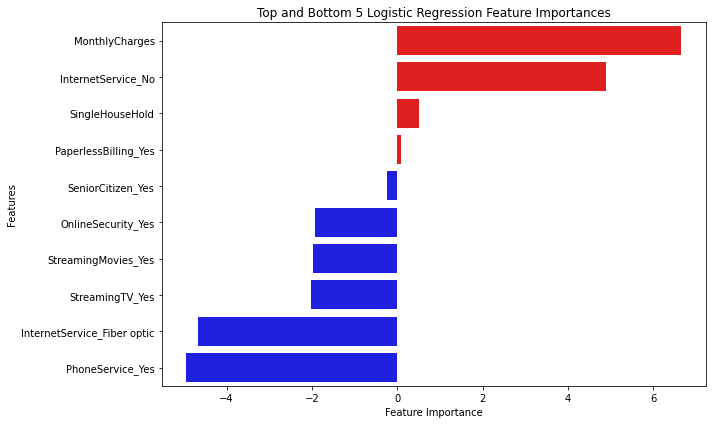

In [210]:
# Sort the feature importances and select the top 5 and bottom 5
top_5_features = log_reg_importance.sort_values(ascending=False).head(5)
bottom_5_features = log_reg_importance.sort_values(ascending=False).tail(5)

# Combine the top 5 and bottom 5 features
top_bottom_features = pd.concat([top_5_features, bottom_5_features])

# Reset index to get feature names in a column
top_bottom_features = top_bottom_features.reset_index()
top_bottom_features.columns = ['Feature', 'Importance']

# Plotting the barplot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_bottom_features,
            palette=['red' if x > 0 else 'blue' for x in top_bottom_features['Importance']])
plt.title('Top and Bottom 5 Logistic Regression Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [200]:
# Predict on the test data using logistic regression
log_reg_pred = log_reg.predict(X_test_scaled)

# Predict on the test data using decision tree
decision_tree_pred = decision_tree.predict(X_test_scaled)


In [201]:
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score

# Calculate accuracy for both models
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)

# Calculate precision for both models
log_reg_precision = precision_score(y_test, log_reg_pred)
decision_tree_precision = precision_score(y_test, decision_tree_pred)

# Calculate recall for both models
log_reg_recall = recall_score(y_test, log_reg_pred)
decision_tree_recall = recall_score(y_test, decision_tree_pred)

# Calculate F1 score for both models
log_reg_f1 = f1_score(y_test, log_reg_pred)
decision_tree_f1 = f1_score(y_test, decision_tree_pred)

# Print the results
print(f"Logistic Regression Recall: {log_reg_recall:.4f}")
print(f"Logistic Regression F1 Score: {log_reg_f1:.4f}")

print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")
print(f"Logistic Regression Precision: {log_reg_precision:.4f}")

# Print the results
print(f"Decision Tree Recall: {decision_tree_recall:.4f}")
print(f"Decision Tree F1 Score: {decision_tree_f1:.4f}")

print(f"Decision Tree Accuracy: {decision_tree_accuracy:.4f}")
print(f"Decision Tree Precision: {decision_tree_precision:.4f}")

Logistic Regression Recall: 0.6845
Logistic Regression F1 Score: 0.6176
Logistic Regression Accuracy: 0.7750
Logistic Regression Precision: 0.5626
Decision Tree Recall: 0.5267
Decision Tree F1 Score: 0.4907
Decision Tree Accuracy: 0.7097
Decision Tree Precision: 0.4592


In [206]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline # Use this pipeline to include SMOTE in cross-validation
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score


# Define a stratified k-fold cross-validation strategy
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline with SMOTE and logistic regression
log_reg_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Create a pipeline with SMOTE and decision tree
decision_tree_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])






# Define custom scorers if you want to use metrics that require additional parameters like 'average'
precision_scorer = make_scorer(precision_score, pos_label=1)
recall_scorer = make_scorer(recall_score, pos_label=1)
accuracy_scorer = make_scorer(accuracy_score)

# Evaluate the logistic regression pipeline with cross-validation for different metrics
log_reg_precision_scores = cross_val_score(log_reg_pipeline, X, y, scoring=precision_scorer, cv=stratified_kfold)
log_reg_recall_scores = cross_val_score(log_reg_pipeline, X, y, scoring=recall_scorer, cv=stratified_kfold)
log_reg_accuracy_scores = cross_val_score(log_reg_pipeline, X, y, scoring=accuracy_scorer, cv=stratified_kfold)



# Evaluate the decision tree pipeline with cross-validation for different metrics
decision_tree_precision_scores = cross_val_score(decision_tree_pipeline, X, y, scoring=precision_scorer, cv=stratified_kfold)
decision_tree_recall_scores = cross_val_score(decision_tree_pipeline, X, y, scoring=recall_scorer, cv=stratified_kfold)
decision_tree_accuracy_scores = cross_val_score(decision_tree_pipeline, X, y, scoring=accuracy_scorer, cv=stratified_kfold)

log_reg_precision_mean = log_reg_precision_scores.mean()
log_reg_recall_mean = log_reg_recall_scores.mean()
log_reg_accuracy_mean = log_reg_accuracy_scores.mean()

decision_tree_precision_mean = decision_tree_precision_scores.mean()
decision_tree_recall_mean = decision_tree_recall_scores.mean()
decision_tree_accuracy_mean = decision_tree_accuracy_scores.mean()


# Print the mean scores for logistic regression
print(f"Logistic Regression Mean Precision: {log_reg_precision_scores.mean():.4f}")
print(f"Logistic Regression Mean Recall: {log_reg_recall_scores.mean():.4f}")
print(f"Logistic Regression Mean Accuracy: {log_reg_accuracy_scores.mean():.4f}")

# Evaluate the logistic regression pipeline with cross-validation
log_reg_scores = cross_val_score(log_reg_pipeline, X, y, scoring='roc_auc', cv=stratified_kfold)
print(f"Logistic Regression Cross-Validated ROC AUC Scores: {log_reg_scores}")
print(f"Logistic Regression Mean ROC AUC Score: {log_reg_scores.mean():.4f}")


# Print the mean scores for the decision tree
print(f"Decision Tree Mean Precision: {decision_tree_precision_scores.mean():.4f}")
print(f"Decision Tree Mean Recall: {decision_tree_recall_scores.mean():.4f}")
print(f"Decision Tree Mean Accuracy: {decision_tree_accuracy_scores.mean():.4f}")



# Evaluate the decision tree pipeline with cross-validation
decision_tree_scores = cross_val_score(decision_tree_pipeline, X, y, scoring='roc_auc', cv=stratified_kfold)
print(f"Decision Tree Cross-Validated ROC AUC Scores: {decision_tree_scores}")
print(f"Decision Tree Mean ROC AUC Score: {decision_tree_scores.mean():.4f}")



log_reg_roc_mean = log_reg_scores.mean()

decision_tree_roc_mean = decision_tree_scores.mean()



Logistic Regression Mean Precision: 0.5280
Logistic Regression Mean Recall: 0.7747
Logistic Regression Mean Accuracy: 0.7564
Logistic Regression Cross-Validated ROC AUC Scores: [0.85133561 0.84174611 0.85898887 0.82425691 0.82982732]
Logistic Regression Mean ROC AUC Score: 0.8412
Decision Tree Mean Precision: 0.4806
Decision Tree Mean Recall: 0.5554
Decision Tree Mean Accuracy: 0.7224
Decision Tree Cross-Validated ROC AUC Scores: [0.66831874 0.67139425 0.68183627 0.6647084  0.66362912]
Decision Tree Mean ROC AUC Score: 0.6700


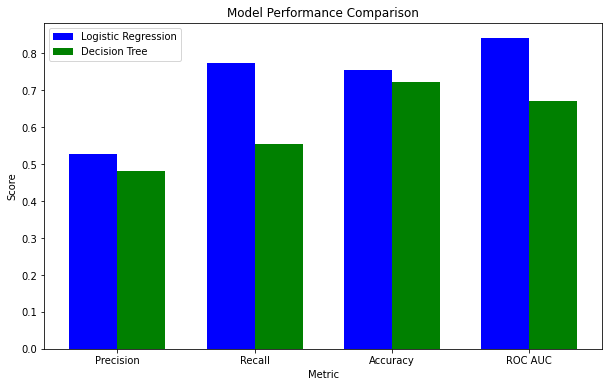

In [208]:
import matplotlib.pyplot as plt
import numpy as np

# Scores for logistic regression and decision tree
log_reg_scores = [log_reg_precision_mean, log_reg_recall_mean, log_reg_accuracy_mean, log_reg_roc_mean ]
decision_tree_scores = [decision_tree_precision_mean, decision_tree_recall_mean, decision_tree_accuracy_mean, decision_tree_roc_mean]

# Set the positions and width for the bars
pos = np.arange(len(log_reg_scores))
bar_width = 0.35

# Plotting the bars
plt.figure(figsize=(10, 6))

plt.bar(pos - bar_width/2, log_reg_scores, bar_width, label='Logistic Regression', color='blue')
plt.bar(pos + bar_width/2, decision_tree_scores, bar_width, label='Decision Tree', color='green')

# Add labels, title, and legend
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(pos, ['Precision', 'Recall', 'Accuracy', 'ROC AUC'])
plt.legend()

# Show the plot
plt.show()

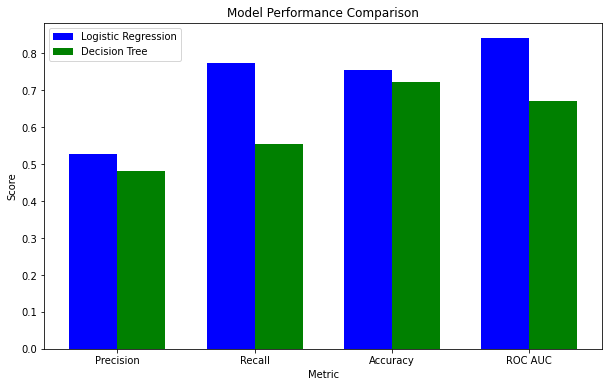

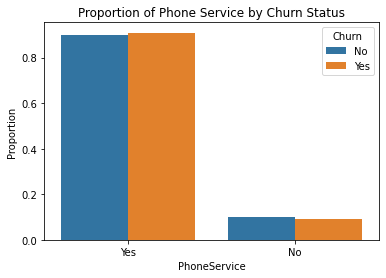

In [36]:
import matplotlib.pyplot as plt
import seaborn as snslp
import pandas as pd

# Calculate the proportion of each PhoneService category within each Churn group
prop_df = (df.groupby('Churn')['PhoneService']
           .value_counts(normalize=True)
           .rename('Proportion')
           .reset_index())

# Plotting the barplot with proportions
plt.figure(figsize=(6, 4))
sns.barplot(x='PhoneService', y='Proportion', hue='Churn', data=prop_df)
plt.title('Proportion of Phone Service by Churn Status')
plt.ylabel('Proportion')
plt.show()



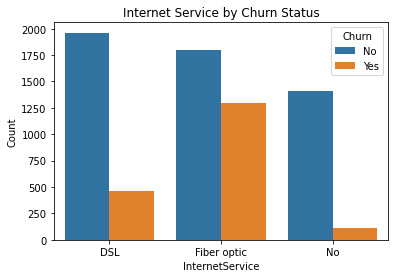

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Internet Service by Churn Status')
plt.ylabel('Count')
plt.show()

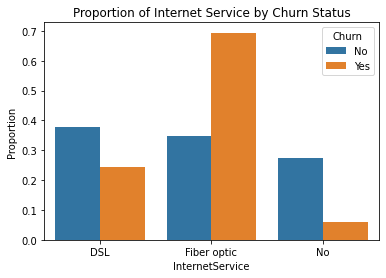

In [37]:
plt.figure(figsize=(6, 4))
# Calculate the proportion of each InternetService category within each Churn group
prop_df = (df.groupby('Churn')['InternetService']
           .value_counts(normalize=True)
           .rename('Proportion')
           .reset_index())

# Plotting the barplot with proportions
sns.barplot(x='InternetService', y='Proportion', hue='Churn', data=prop_df)
plt.title('Proportion of Internet Service by Churn Status')
plt.ylabel('Proportion')
plt.show()

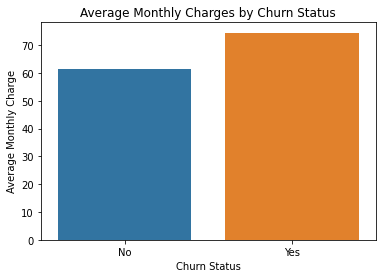

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean MonthlyCharges for each churn group
mean_monthly_charges = df.groupby('Churn')['MonthlyCharges'].mean().reset_index()

# Plotting the barplot for MonthlyCharges
plt.figure(figsize=(6, 4))
sns.barplot(x='Churn', y='MonthlyCharges', data=mean_monthly_charges)
plt.title('Average Monthly Charges by Churn Status')
plt.ylabel('Average Monthly Charge')
plt.xlabel('Churn Status')
plt.show()

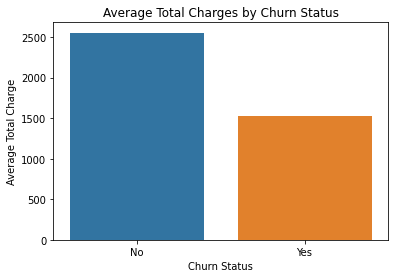

In [52]:
# Calculate the mean TotalCharges for each churn group
mean_total_charges = df.groupby('Churn')['TotalCharges'].mean().reset_index()

# Plotting the barplot for TotalCharges
plt.figure(figsize=(6, 4))
sns.barplot(x='Churn', y='TotalCharges', data=mean_total_charges)
plt.title('Average Total Charges by Churn Status')
plt.ylabel('Average Total Charge')
plt.xlabel('Churn Status')
plt.show()
